In [1]:
# ============================================================
# –ë–õ–û–ö 1: –ò–ú–ü–û–†–¢–´ –ò –ù–ê–°–¢–†–û–ô–ö–ê –û–ö–†–£–ñ–ï–ù–ò–Ø
# ============================================================
# –ó–¥–µ—Å—å –º—ã –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è —Ä–∞–±–æ—Ç—ã

import torch
import torch.nn as nn  # –î–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π
import torch.optim as optim  # –î–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤ (Adam, SGD –∏ —Ç.–¥.)
from torch.utils.data import DataLoader, random_split  # –î–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö –±–∞—Ç—á–∞–º–∏

import torchvision  # –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ —Å –≥–æ—Ç–æ–≤—ã–º–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞–º–∏ –∏ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è–º–∏
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt  # –î–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
from sklearn.metrics import confusion_matrix  # –î–ª—è –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
import seaborn as sns  # –î–ª—è –∫—Ä–∞—Å–∏–≤–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ confusion matrix

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –¥–æ—Å—Ç—É–ø–Ω–∞ –ª–∏ GPU (—É—Å–∫–æ—Ä–∏—Ç –æ–±—É—á–µ–Ω–∏–µ –≤ ~10-100 —Ä–∞–∑)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'–ò—Å–ø–æ–ª—å–∑—É–µ–º–æ–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ: {device}')

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º seed –¥–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
# (—á—Ç–æ–±—ã –ø—Ä–∏ –ø–æ–≤—Ç–æ—Ä–Ω–æ–º –∑–∞–ø—É—Å–∫–µ –ø–æ–ª—É—á–∏—Ç—å —Ç–µ –∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã)
torch.manual_seed(42)
np.random.seed(42)

–ò—Å–ø–æ–ª—å–∑—É–µ–º–æ–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ: cpu


–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ MNIST...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.91M/9.91M [00:00<00:00, 24.3MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28.9k/28.9k [00:00<00:00, 611kB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.65M/1.65M [00:00<00:00, 5.57MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.54k/4.54k [00:00<00:00, 6.20MB/s]

–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: 54000
–†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: 6000
–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: 10000

–ü—Ä–∏–º–µ—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞:


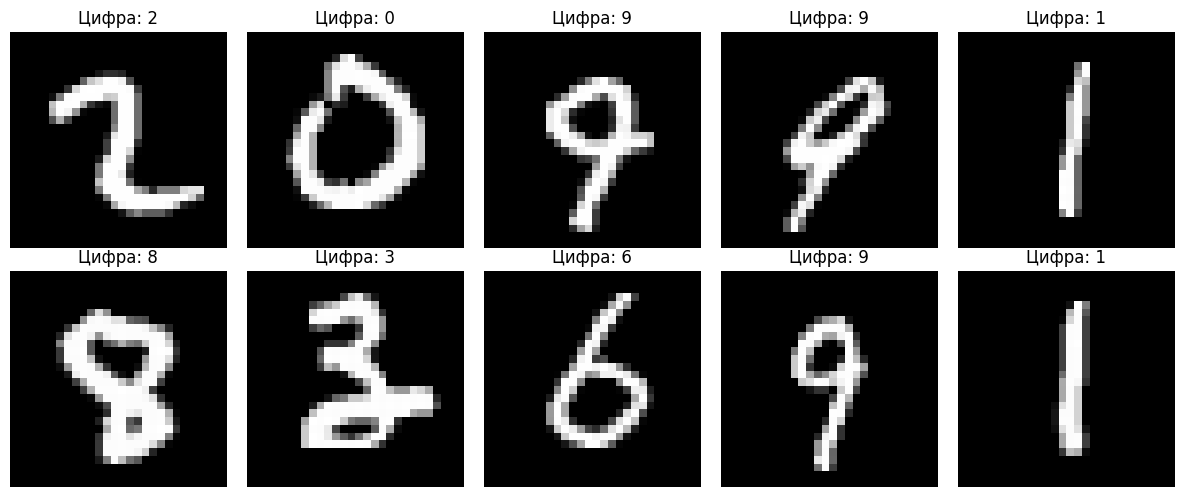


–§–æ—Ä–º–∞ –æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è: torch.Size([1, 28, 28])
–§–æ—Ä–º–∞ –±–∞—Ç—á–∞: torch.Size([128, 1, 28, 28])


In [2]:
# ============================================================
# –ë–õ–û–ö 2: –ó–ê–ì–†–£–ó–ö–ê –ò –ü–û–î–ì–û–¢–û–í–ö–ê –î–ê–ù–ù–´–•
# ============================================================

# –®–∞–≥ 1: –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ –¥–ª—è –¥–∞–Ω–Ω—ã—Ö
# -------------------------------------------
# ToTensor() - –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ PIL/numpy –≤ —Ç–µ–Ω–∑–æ—Ä PyTorch
# Normalize() - –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ—Ç –¥–∞–Ω–Ω—ã–µ (mean=0.5, std=0.5 –ø–µ—Ä–µ–≤–æ–¥–∏—Ç –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑ [0,1] –≤ [-1,1])
transform = transforms.Compose([
    transforms.ToTensor(),  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Ç–µ–Ω–∑–æ—Ä (–∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç 0 –¥–æ 1)
    transforms.Normalize((0.5,), (0.5,))  # –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º: (x - 0.5) / 0.5
])

# –®–∞–≥ 2: –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç MNIST
# -------------------------------------------
# MNIST —Å–æ–¥–µ—Ä–∂–∏—Ç 60000 –æ–±—É—á–∞—é—â–∏—Ö –∏ 10000 —Ç–µ—Å—Ç–æ–≤—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Ü–∏—Ñ—Ä 28x28 –ø–∏–∫—Å–µ–ª–µ–π
print('–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ MNIST...')

# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø–æ–ª–Ω—ã–π –æ–±—É—á–∞—é—â–∏–π –¥–∞—Ç–∞—Å–µ—Ç (60000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π)
full_train_dataset = datasets.MNIST(
    root='./data',  # –ü–∞–ø–∫–∞ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö
    train=True,  # –ë–µ—Ä–µ–º –æ–±—É—á–∞—é—â—É—é —á–∞—Å—Ç—å
    download=True,  # –°–∫–∞—á–∏–≤–∞–µ–º, –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç
    transform=transform  # –ü—Ä–∏–º–µ–Ω—è–µ–º –Ω–∞—à–∏ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏
)

# –ó–∞–≥—Ä—É–∂–∞–µ–º —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç (10000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π)
test_dataset = datasets.MNIST(
    root='./data',
    train=False,  # –ë–µ—Ä–µ–º —Ç–µ—Å—Ç–æ–≤—É—é —á–∞—Å—Ç—å
    download=True,
    transform=transform
)

# –®–∞–≥ 3: –†–∞–∑–¥–µ–ª—è–µ–º train –Ω–∞ train –∏ validation (90% / 10%)
# -------------------------------------------
# –≠—Ç–æ –Ω—É–∂–Ω–æ –¥–ª—è —á–µ—Å—Ç–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è
train_size = int(0.9 * len(full_train_dataset))  # 54000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
val_size = len(full_train_dataset) - train_size  # 6000 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π

train_dataset, val_dataset = random_split(
    full_train_dataset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)  # –î–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏
)

print(f'–†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: {len(train_dataset)}')
print(f'–†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: {len(val_dataset)}')
print(f'–†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: {len(test_dataset)}')

# –®–∞–≥ 4: –°–æ–∑–¥–∞–µ–º DataLoader –¥–ª—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö –±–∞—Ç—á–∞–º–∏
# -------------------------------------------
# DataLoader –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏:
# - —Ä–∞–∑–±–∏–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –Ω–∞ –±–∞—Ç—á–∏
# - –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ (shuffle=True)
# - –∑–∞–≥—Ä—É–∂–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ (num_workers)

batch_size = 128  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –æ–¥–Ω–æ–º –±–∞—Ç—á–µ

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,  # –ü–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∫–∞–∂–¥—É—é —ç–ø–æ—Ö—É (–≤–∞–∂–Ω–æ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è!)
    num_workers=2  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Ü–µ—Å—Å–æ–≤ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,  # –í–∞–ª–∏–¥–∞—Ü–∏—é –Ω–µ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,  # –¢–µ—Å—Ç –Ω–µ –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º
    num_workers=2
)

# –®–∞–≥ 5: –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞
# -------------------------------------------
print('\n–ü—Ä–∏–º–µ—Ä—ã –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞:')

# –ü–æ–ª—É—á–∞–µ–º –æ–¥–∏–Ω –±–∞—Ç—á –¥–∞–Ω–Ω—ã—Ö
examples = iter(train_loader)
example_data, example_targets = next(examples)

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –ø–µ—Ä–≤—ã–µ 10 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ç–µ–Ω–∑–æ—Ä –æ–±—Ä–∞—Ç–Ω–æ –≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    img = example_data[i].squeeze()  # –£–±–∏—Ä–∞–µ–º –ª–∏—à–Ω–µ–µ –∏–∑–º–µ—Ä–µ–Ω–∏–µ
    ax.imshow(img, cmap='gray')
    ax.set_title(f'–¶–∏—Ñ—Ä–∞: {example_targets[i].item()}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print(f'\n–§–æ—Ä–º–∞ –æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è: {example_data[0].shape}')  # [1, 28, 28]
print(f'–§–æ—Ä–º–∞ –±–∞—Ç—á–∞: {example_data.shape}')  # [batch_size, 1, 28, 28]

In [3]:
# ============================================================
# –ë–õ–û–ö 3: –û–ü–†–ï–î–ï–õ–ï–ù–ò–ï –ú–û–î–ï–õ–ò (MLP - –ú–ù–û–ì–û–°–õ–û–ô–ù–´–ô –ü–ï–†–°–ï–ü–¢–†–û–ù)
# ============================================================

class MLP(nn.Module):
    """
    –ú–Ω–æ–≥–æ—Å–ª–æ–π–Ω—ã–π –ø–µ—Ä—Å–µ–ø—Ç—Ä–æ–Ω (Multi-Layer Perceptron)

    –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞:
    Input (784) -> Linear(784, 256) -> ReLU -> Dropout(0.2) ->
    Linear(256, 128) -> ReLU -> Dropout(0.2) ->
    Linear(128, 10) -> Output (10 –∫–ª–∞—Å—Å–æ–≤)
    """

    def __init__(self, input_size=784, hidden1=256, hidden2=128, num_classes=10, dropout_rate=0.2):
        """
        –ö–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä –º–æ–¥–µ–ª–∏

        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
        - input_size: —Ä–∞–∑–º–µ—Ä –≤—Ö–æ–¥–∞ (28*28 = 784 –¥–ª—è MNIST)
        - hidden1: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–π—Ä–æ–Ω–æ–≤ –≤ –ø–µ—Ä–≤–æ–º —Å–∫—Ä—ã—Ç–æ–º —Å–ª–æ–µ
        - hidden2: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–π—Ä–æ–Ω–æ–≤ –≤–æ –≤—Ç–æ—Ä–æ–º —Å–∫—Ä—ã—Ç–æ–º —Å–ª–æ–µ
        - num_classes: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã—Ö–æ–¥–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ (10 —Ü–∏—Ñ—Ä: 0-9)
        - dropout_rate: –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å dropout (–¥–ª—è —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏)
        """
        super(MLP, self).__init__()

        # –ü–µ—Ä–≤—ã–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π: 784 –≤—Ö–æ–¥–∞ -> 256 –≤—ã—Ö–æ–¥–æ–≤
        self.fc1 = nn.Linear(input_size, hidden1)

        # –í—Ç–æ—Ä–æ–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π: 256 –≤—Ö–æ–¥–æ–≤ -> 128 –≤—ã—Ö–æ–¥–æ–≤
        self.fc2 = nn.Linear(hidden1, hidden2)

        # –¢—Ä–µ—Ç–∏–π –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π (–≤—ã—Ö–æ–¥–Ω–æ–π): 128 –≤—Ö–æ–¥–æ–≤ -> 10 –≤—ã—Ö–æ–¥–æ–≤
        self.fc3 = nn.Linear(hidden2, num_classes)

        # –§—É–Ω–∫—Ü–∏—è –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ ReLU (–ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ 0)
        self.relu = nn.ReLU()

        # Dropout –¥–ª—è —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ (—Å–ª—É—á–∞–π–Ω–æ "–≤—ã–∫–ª—é—á–∞–µ—Ç" –Ω–µ–π—Ä–æ–Ω—ã –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏)
        # –≠—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç –∏–∑–±–µ–∂–∞—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        """
        –ü—Ä—è–º–æ–π –ø—Ä–æ—Ö–æ–¥ (forward pass) —á–µ—Ä–µ–∑ —Å–µ—Ç—å

        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
        - x: –≤—Ö–æ–¥–Ω–æ–π —Ç–µ–Ω–∑–æ—Ä —Ñ–æ—Ä–º—ã [batch_size, 1, 28, 28]

        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
        - out: –≤—ã—Ö–æ–¥–Ω–æ–π —Ç–µ–Ω–∑–æ—Ä —Ñ–æ—Ä–º—ã [batch_size, 10] (–ª–æ–≥–∏—Ç—ã –¥–ª—è 10 –∫–ª–∞—Å—Å–æ–≤)
        """

        # –®–∞–≥ 1: –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏–∑ —Ñ–æ—Ä–º—ã [batch_size, 1, 28, 28]
        #         –≤ –≤–µ–∫—Ç–æ—Ä —Ñ–æ—Ä–º—ã [batch_size, 784]
        x = x.view(x.size(0), -1)  # Flatten: –¥–µ–ª–∞–µ–º –∏–∑ –º–∞—Ç—Ä–∏—Ü—ã –≤–µ–∫—Ç–æ—Ä

        # –®–∞–≥ 2: –ü–µ—Ä–≤—ã–π —Å–ª–æ–π + –∞–∫—Ç–∏–≤–∞—Ü–∏—è + dropout
        x = self.fc1(x)      # [batch_size, 784] -> [batch_size, 256]
        x = self.relu(x)     # –ü—Ä–∏–º–µ–Ω—è–µ–º ReLU
        x = self.dropout(x)  # –ü—Ä–∏–º–µ–Ω—è–µ–º dropout (—Ç–æ–ª—å–∫–æ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è!)

        # –®–∞–≥ 3: –í—Ç–æ—Ä–æ–π —Å–ª–æ–π + –∞–∫—Ç–∏–≤–∞—Ü–∏—è + dropout
        x = self.fc2(x)      # [batch_size, 256] -> [batch_size, 128]
        x = self.relu(x)
        x = self.dropout(x)

        # –®–∞–≥ 4: –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π (–±–µ–∑ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏! CrossEntropyLoss –ø—Ä–∏–º–µ–Ω–∏—Ç softmax)
        out = self.fc3(x)    # [batch_size, 128] -> [batch_size, 10]

        return out


# –°–æ–∑–¥–∞–µ–º —ç–∫–∑–µ–º–ø–ª—è—Ä –º–æ–¥–µ–ª–∏ –∏ –ø–µ—Ä–µ–Ω–æ—Å–∏–º –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ (GPU –∏–ª–∏ CPU)
model = MLP().to(device)

# –í—ã–≤–æ–¥–∏–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –º–æ–¥–µ–ª–∏
print('–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –º–æ–¥–µ–ª–∏:')
print(model)
print('\n' + '='*60)

# –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—É—á–∞–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—É—á–∞–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: {total_params:,}')
print('='*60)

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–∏ –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ
with torch.no_grad():  # –û—Ç–∫–ª—é—á–∞–µ–º –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤
    sample_input = torch.randn(1, 1, 28, 28).to(device)  # –°–ª—É—á–∞–π–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
    sample_output = model(sample_input)
    print(f'\n–§–æ—Ä–º–∞ –≤—Ö–æ–¥–∞: {sample_input.shape}')
    print(f'–§–æ—Ä–º–∞ –≤—ã—Ö–æ–¥–∞: {sample_output.shape}')
    print(f'–ü—Ä–∏–º–µ—Ä –≤—ã—Ö–æ–¥–∞ (–ª–æ–≥–∏—Ç—ã): {sample_output[0].cpu().numpy()}')

–ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ –º–æ–¥–µ–ª–∏:
MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—É—á–∞–µ–º—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: 235,146

–§–æ—Ä–º–∞ –≤—Ö–æ–¥–∞: torch.Size([1, 1, 28, 28])
–§–æ—Ä–º–∞ –≤—ã—Ö–æ–¥–∞: torch.Size([1, 10])
–ü—Ä–∏–º–µ—Ä –≤—ã—Ö–æ–¥–∞ (–ª–æ–≥–∏—Ç—ã): [ 0.17421469 -0.02710439 -0.10737211 -0.23570263 -0.06744696  0.02530478
 -0.00801104  0.01177571 -0.17946595  0.00570373]


In [5]:
# ============================================================
# –ë–õ–û–ö 4: –§–£–ù–ö–¶–ò–Ø –ü–û–¢–ï–†–¨ –ò –û–ü–¢–ò–ú–ò–ó–ê–¢–û–†
# ============================================================

# –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å (Loss Function)
# -------------------------------------------
# CrossEntropyLoss - —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
# –û–Ω–∞ –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç Softmax –∏ Negative Log Likelihood Loss
# –í–∞–∂–Ω–æ: –º–æ–¥–µ–ª—å –¥–æ–ª–∂–Ω–∞ –≤—ã–¥–∞–≤–∞—Ç—å "—Å—ã—Ä—ã–µ" –ª–æ–≥–∏—Ç—ã (–±–µ–∑ softmax)!
criterion = nn.CrossEntropyLoss()

# –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
# -------------------------------------------
# Adam - –∞–¥–∞–ø—Ç–∏–≤–Ω—ã–π –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤
# lr (learning rate) - —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è, –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç —Ä–∞–∑–º–µ—Ä —à–∞–≥–æ–≤ –ø—Ä–∏ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–∏ –≤–µ—Å–æ–≤
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # lr = 0.001

print('–ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ–±—É—á–µ–Ω–∏—è:')
print(f'–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å: {criterion}')
print(f'–û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä: {optimizer}')
print(f'Learning rate: {optimizer.param_groups[0]["lr"]}')

# –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ: –ø–ª–∞–Ω–∏—Ä–æ–≤—â–∏–∫ learning rate
# -------------------------------------------
# –£–º–µ–Ω—å—à–∞–µ—Ç learning rate –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è –¥–ª—è –ª—É—á—à–µ–π —Å—Ö–æ–¥–∏–º–æ—Å—Ç–∏
# ReduceLROnPlateau —É–º–µ–Ω—å—à–∞–µ—Ç lr, –∫–æ–≥–¥–∞ –º–µ—Ç—Ä–∏–∫–∞ –ø–µ—Ä–µ—Å—Ç–∞–µ—Ç —É–ª—É—á—à–∞—Ç—å—Å—è
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',      # –°–ª–µ–¥–∏–º –∑–∞ —É–º–µ–Ω—å—à–µ–Ω–∏–µ–º loss
    factor=0.5,      # –£–º–µ–Ω—å—à–∞–µ–º lr –≤ 2 —Ä–∞–∑–∞
    patience=2,      # –ñ–¥–µ–º 2 —ç–ø–æ—Ö–∏ –±–µ–∑ —É–ª—É—á—à–µ–Ω–∏—è
)

print(f'–ü–ª–∞–Ω–∏—Ä–æ–≤—â–∏–∫ LR: {scheduler}')

–ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ–±—É—á–µ–Ω–∏—è:
–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å: CrossEntropyLoss()
–û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Learning rate: 0.001
–ü–ª–∞–Ω–∏—Ä–æ–≤—â–∏–∫ LR: <torch.optim.lr_scheduler.ReduceLROnPlateau object at 0x7d09b2d4db20>


In [6]:
# ============================================================
# –ë–õ–û–ö 5: –§–£–ù–ö–¶–ò–ò –î–õ–Ø –û–ë–£–ß–ï–ù–ò–Ø –ò –í–ê–õ–ò–î–ê–¶–ò–ò
# ============================================================

def train_epoch(model, dataloader, criterion, optimizer, device):
    """
    –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ –æ–¥–Ω–æ–π —ç–ø–æ—Ö–µ

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - model: –Ω–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å
    - dataloader: –∑–∞–≥—Ä—É–∑—á–∏–∫ –¥–∞–Ω–Ω—ã—Ö
    - criterion: —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å
    - optimizer: –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
    - device: —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ (CPU –∏–ª–∏ GPU)

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - avg_loss: —Å—Ä–µ–¥–Ω—è—è loss –∑–∞ —ç–ø–æ—Ö—É
    - accuracy: —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
    """

    # –ü–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ–±—É—á–µ–Ω–∏—è
    # (–≤–∫–ª—é—á–∞–µ—Ç dropout –∏ batch normalization)
    model.train()

    running_loss = 0.0  # –ù–∞–∫–æ–ø–ª–µ–Ω–Ω–∞—è loss
    correct = 0  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    total = 0  # –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–º–µ—Ä–æ–≤

    # –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –≤—Å–µ–º –±–∞—Ç—á–∞–º
    for batch_idx, (images, labels) in enumerate(dataloader):
        # –ü–µ—Ä–µ–Ω–æ—Å–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ (GPU/CPU)
        images = images.to(device)
        labels = labels.to(device)

        # –®–ê–ì 1: –û–±–Ω—É–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã
        # (–≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –Ω–∞–∫–∞–ø–ª–∏–≤–∞—é—Ç—Å—è, –ø–æ—ç—Ç–æ–º—É –∏—Ö –Ω—É–∂–Ω–æ –æ–±–Ω—É–ª—è—Ç—å –ø–µ—Ä–µ–¥ –∫–∞–∂–¥—ã–º –±–∞—Ç—á–µ–º)
        optimizer.zero_grad()

        # –®–ê–ì 2: –ü—Ä—è–º–æ–π –ø—Ä–æ—Ö–æ–¥ (forward pass)
        outputs = model(images)  # –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏

        # –®–ê–ì 3: –í—ã—á–∏—Å–ª—è–µ–º loss
        loss = criterion(outputs, labels)

        # –®–ê–ì 4: –û–±—Ä–∞—Ç–Ω—ã–π –ø—Ä–æ—Ö–æ–¥ (backward pass)
        # –í—ã—á–∏—Å–ª—è–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
        loss.backward()

        # –®–ê–ì 5: –û–±–Ω–æ–≤–ª—è–µ–º –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏
        optimizer.step()

        # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
        running_loss += loss.item()  # –ù–∞–∫–∞–ø–ª–∏–≤–∞–µ–º loss

        # –í—ã—á–∏—Å–ª—è–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å
        _, predicted = torch.max(outputs.data, 1)  # –ë–µ—Ä–µ–º –∫–ª–∞—Å—Å —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # –í—ã–≤–æ–¥–∏–º –ø—Ä–æ–≥—Ä–µ—Å—Å –∫–∞–∂–¥—ã–µ 100 –±–∞—Ç—á–µ–π
        if (batch_idx + 1) % 100 == 0:
            print(f'  –ë–∞—Ç—á [{batch_idx + 1}/{len(dataloader)}], '
                  f'Loss: {loss.item():.4f}, '
                  f'Accuracy: {100 * correct / total:.2f}%')

    # –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞ —ç–ø–æ—Ö—É
    avg_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total

    return avg_loss, accuracy


def validate(model, dataloader, criterion, device):
    """
    –í–∞–ª–∏–¥–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ (–æ—Ü–µ–Ω–∫–∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π/—Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ)

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - model: –Ω–µ–π—Ä–æ–Ω–Ω–∞—è —Å–µ—Ç—å
    - dataloader: –∑–∞–≥—Ä—É–∑—á–∏–∫ –¥–∞–Ω–Ω—ã—Ö
    - criterion: —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å
    - device: —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ (CPU –∏–ª–∏ GPU)

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - avg_loss: —Å—Ä–µ–¥–Ω—è—è loss
    - accuracy: —Ç–æ—á–Ω–æ—Å—Ç—å
    """

    # –ü–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –æ—Ü–µ–Ω–∫–∏
    # (–æ—Ç–∫–ª—é—á–∞–µ—Ç dropout –∏ batch normalization)
    model.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    # –û—Ç–∫–ª—é—á–∞–µ–º –≤—ã—á–∏—Å–ª–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ (—ç–∫–æ–Ω–æ–º–∏—Ç –ø–∞–º—è—Ç—å –∏ —É—Å–∫–æ—Ä—è–µ—Ç —Ä–∞–±–æ—Ç—É)
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            # –ü—Ä—è–º–æ–π –ø—Ä–æ—Ö–æ–¥
            outputs = model(images)
            loss = criterion(outputs, labels)

            # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total

    return avg_loss, accuracy


print('–§—É–Ω–∫—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –≥–æ—Ç–æ–≤—ã!')

–§—É–Ω–∫—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –≥–æ—Ç–æ–≤—ã!


In [7]:
# ============================================================
# –ë–õ–û–ö 6: –û–°–ù–û–í–ù–û–ô –¶–ò–ö–õ –û–ë–£–ß–ï–ù–ò–Ø
# ============================================================

# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –æ–±—É—á–µ–Ω–∏—è
num_epochs = 10  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö (–ø–æ–ª–Ω—ã—Ö –ø—Ä–æ—Ö–æ–¥–æ–≤ –ø–æ –¥–∞—Ç–∞—Å–µ—Ç—É)

# –°–ø–∏—Å–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∏—Å—Ç–æ—Ä–∏–∏ –æ–±—É—á–µ–Ω–∏—è (–¥–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤)
train_losses = []  # Loss –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
val_losses = []    # Loss –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
train_accuracies = []  # Accuracy –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
val_accuracies = []    # Accuracy –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ

print('='*70)
print('–ù–ê–ß–ê–õ–û –û–ë–£–ß–ï–ù–ò–Ø')
print('='*70)

# –û—Å–Ω–æ–≤–Ω–æ–π —Ü–∏–∫–ª –ø–æ —ç–ø–æ—Ö–∞–º
for epoch in range(num_epochs):
    print(f'\n–≠–ø–æ—Ö–∞ {epoch + 1}/{num_epochs}')
    print('-' * 70)

    # ===== –û–ë–£–ß–ï–ù–ò–ï =====
    print('–û–±—É—á–µ–Ω–∏–µ...')
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f'  –°—Ä–µ–¥–Ω—è—è Train Loss: {train_loss:.4f}')
    print(f'  Train Accuracy: {train_acc:.2f}%')

    # ===== –í–ê–õ–ò–î–ê–¶–ò–Ø =====
    print('–í–∞–ª–∏–¥–∞—Ü–∏—è...')
    val_loss, val_acc = validate(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'  Validation Loss: {val_loss:.4f}')
    print(f'  Validation Accuracy: {val_acc:.2f}%')

    # –û–±–Ω–æ–≤–ª—è–µ–º learning rate (–µ—Å–ª–∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è loss –Ω–µ —É–ª—É—á—à–∞–µ—Ç—Å—è)
    scheduler.step(val_loss)

    # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å
    if epoch == 0 or val_loss < min(val_losses[:-1]):
        print('  ‚úì –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å!')
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'val_loss': val_loss,
            'val_accuracy': val_acc,
        }, 'best_model.pth')

print('\n' + '='*70)
print('–û–ë–£–ß–ï–ù–ò–ï –ó–ê–í–ï–†–®–ï–ù–û!')
print('='*70)

# –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –¥–ª—è —Ñ–∏–Ω–∞–ª—å–Ω–æ–π –æ—Ü–µ–Ω–∫–∏
checkpoint = torch.load('best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
print(f"\n–ó–∞–≥—Ä—É–∂–µ–Ω–∞ –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å —ç–ø–æ—Ö–∏ {checkpoint['epoch'] + 1}")
print(f"Validation Accuracy: {checkpoint['val_accuracy']:.2f}%")

–ù–ê–ß–ê–õ–û –û–ë–£–ß–ï–ù–ò–Ø

–≠–ø–æ—Ö–∞ 1/10
----------------------------------------------------------------------
–û–±—É—á–µ–Ω–∏–µ...
  –ë–∞—Ç—á [100/422], Loss: 0.3362, Accuracy: 72.01%
  –ë–∞—Ç—á [200/422], Loss: 0.4773, Accuracy: 79.98%
  –ë–∞—Ç—á [300/422], Loss: 0.3091, Accuracy: 83.23%
  –ë–∞—Ç—á [400/422], Loss: 0.2004, Accuracy: 85.14%
  –°—Ä–µ–¥–Ω—è—è Train Loss: 0.4650
  Train Accuracy: 85.51%
–í–∞–ª–∏–¥–∞—Ü–∏—è...
  Validation Loss: 0.2265
  Validation Accuracy: 93.22%
  ‚úì –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å!

–≠–ø–æ—Ö–∞ 2/10
----------------------------------------------------------------------
–û–±—É—á–µ–Ω–∏–µ...
  –ë–∞—Ç—á [100/422], Loss: 0.2178, Accuracy: 92.86%
  –ë–∞—Ç—á [200/422], Loss: 0.2622, Accuracy: 92.99%
  –ë–∞—Ç—á [300/422], Loss: 0.2668, Accuracy: 93.24%
  –ë–∞—Ç—á [400/422], Loss: 0.1316, Accuracy: 93.46%
  –°—Ä–µ–¥–Ω—è—è Train Loss: 0.2183
  Train Accuracy: 93.47%
–í–∞–ª–∏–¥–∞—Ü–∏—è...
  Validation Loss: 0.1635
  Validation Accuracy: 95.13%


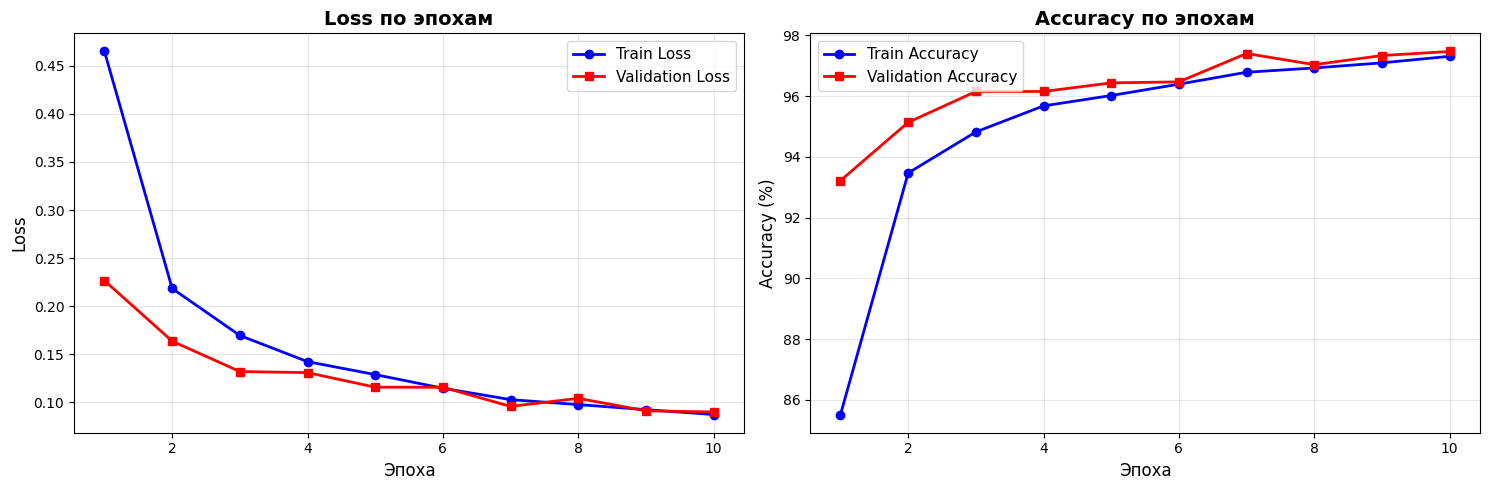


–§–∏–Ω–∞–ª—å–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è:
–§–∏–Ω–∞–ª—å–Ω–∞—è Train Loss: 0.0871
–§–∏–Ω–∞–ª—å–Ω–∞—è Validation Loss: 0.0898
–§–∏–Ω–∞–ª—å–Ω–∞—è Train Accuracy: 97.31%
–§–∏–Ω–∞–ª—å–Ω–∞—è Validation Accuracy: 97.47%
–õ—É—á—à–∞—è Validation Loss: 0.0898 (—ç–ø–æ—Ö–∞ 10)
–õ—É—á—à–∞—è Validation Accuracy: 97.47% (—ç–ø–æ—Ö–∞ 10)


In [8]:
# ============================================================
# –ë–õ–û–ö 7: –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í –û–ë–£–ß–ï–ù–ò–Ø
# ============================================================

# –ì—Ä–∞—Ñ–∏–∫ 1: Loss –ø–æ —ç–ø–æ—Ö–∞–º
# -------------------------------------------
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, 'b-o', label='Train Loss', linewidth=2)
plt.plot(range(1, num_epochs + 1), val_losses, 'r-s', label='Validation Loss', linewidth=2)
plt.xlabel('–≠–ø–æ—Ö–∞', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss –ø–æ —ç–ø–æ—Ö–∞–º', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# –ì—Ä–∞—Ñ–∏–∫ 2: Accuracy –ø–æ —ç–ø–æ—Ö–∞–º
# -------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, 'b-o', label='Train Accuracy', linewidth=2)
plt.plot(range(1, num_epochs + 1), val_accuracies, 'r-s', label='Validation Accuracy', linewidth=2)
plt.xlabel('–≠–ø–æ—Ö–∞', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy –ø–æ —ç–ø–æ—Ö–∞–º', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# –í—ã–≤–æ–¥–∏–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print('\n–§–∏–Ω–∞–ª—å–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–µ–Ω–∏—è:')
print(f'–§–∏–Ω–∞–ª—å–Ω–∞—è Train Loss: {train_losses[-1]:.4f}')
print(f'–§–∏–Ω–∞–ª—å–Ω–∞—è Validation Loss: {val_losses[-1]:.4f}')
print(f'–§–∏–Ω–∞–ª—å–Ω–∞—è Train Accuracy: {train_accuracies[-1]:.2f}%')
print(f'–§–∏–Ω–∞–ª—å–Ω–∞—è Validation Accuracy: {val_accuracies[-1]:.2f}%')
print(f'–õ—É—á—à–∞—è Validation Loss: {min(val_losses):.4f} (—ç–ø–æ—Ö–∞ {val_losses.index(min(val_losses)) + 1})')
print(f'–õ—É—á—à–∞—è Validation Accuracy: {max(val_accuracies):.2f}% (—ç–ø–æ—Ö–∞ {val_accuracies.index(max(val_accuracies)) + 1})')

In [9]:
# ============================================================
# –ë–õ–û–ö 8: –û–¶–ï–ù–ö–ê –ù–ê –¢–ï–°–¢–û–í–û–ô –í–´–ë–û–†–ö–ï
# ============================================================

print('='*70)
print('–û–¶–ï–ù–ö–ê –ù–ê –¢–ï–°–¢–û–í–û–ô –í–´–ë–û–†–ö–ï')
print('='*70)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∏ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫
def get_predictions(model, dataloader, device):
    """
    –ü–æ–ª—É—á–∞–µ—Ç –≤—Å–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - all_preds: –≤—Å–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    - all_labels: –≤—Å–µ –∏—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏
    """
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())

    return np.array(all_preds), np.array(all_labels)

# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
test_preds, test_labels = get_predictions(model, test_loader, device)

# –í—ã—á–∏—Å–ª—è–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–µ
test_accuracy = 100 * np.sum(test_preds == test_labels) / len(test_labels)
print(f'\n‚úì –§–∏–Ω–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_accuracy:.2f}%')
print(f'–ü—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–æ: {np.sum(test_preds == test_labels)}/{len(test_labels)}')

# –í—ã—á–∏—Å–ª—è–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Å—É
print('\n–¢–æ—á–Ω–æ—Å—Ç—å –ø–æ –∫–ª–∞—Å—Å–∞–º (—Ü–∏—Ñ—Ä–∞–º):')
print('-' * 40)
for digit in range(10):
    mask = test_labels == digit
    digit_accuracy = 100 * np.sum(test_preds[mask] == test_labels[mask]) / np.sum(mask)
    correct = np.sum(test_preds[mask] == test_labels[mask])
    total = np.sum(mask)
    print(f'–¶–∏—Ñ—Ä–∞ {digit}: {digit_accuracy:.2f}% ({correct}/{total})')

–û–¶–ï–ù–ö–ê –ù–ê –¢–ï–°–¢–û–í–û–ô –í–´–ë–û–†–ö–ï

‚úì –§–∏–Ω–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 97.50%
–ü—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–æ: 9750/10000

–¢–æ—á–Ω–æ—Å—Ç—å –ø–æ –∫–ª–∞—Å—Å–∞–º (—Ü–∏—Ñ—Ä–∞–º):
----------------------------------------
–¶–∏—Ñ—Ä–∞ 0: 98.78% (968/980)
–¶–∏—Ñ—Ä–∞ 1: 98.85% (1122/1135)
–¶–∏—Ñ—Ä–∞ 2: 97.97% (1011/1032)
–¶–∏—Ñ—Ä–∞ 3: 97.72% (987/1010)
–¶–∏—Ñ—Ä–∞ 4: 98.27% (965/982)
–¶–∏—Ñ—Ä–∞ 5: 96.97% (865/892)
–¶–∏—Ñ—Ä–∞ 6: 97.91% (938/958)
–¶–∏—Ñ—Ä–∞ 7: 96.79% (995/1028)
–¶–∏—Ñ—Ä–∞ 8: 95.07% (926/974)
–¶–∏—Ñ—Ä–∞ 9: 96.43% (973/1009)



–ü–û–°–¢–†–û–ï–ù–ò–ï CONFUSION MATRIX


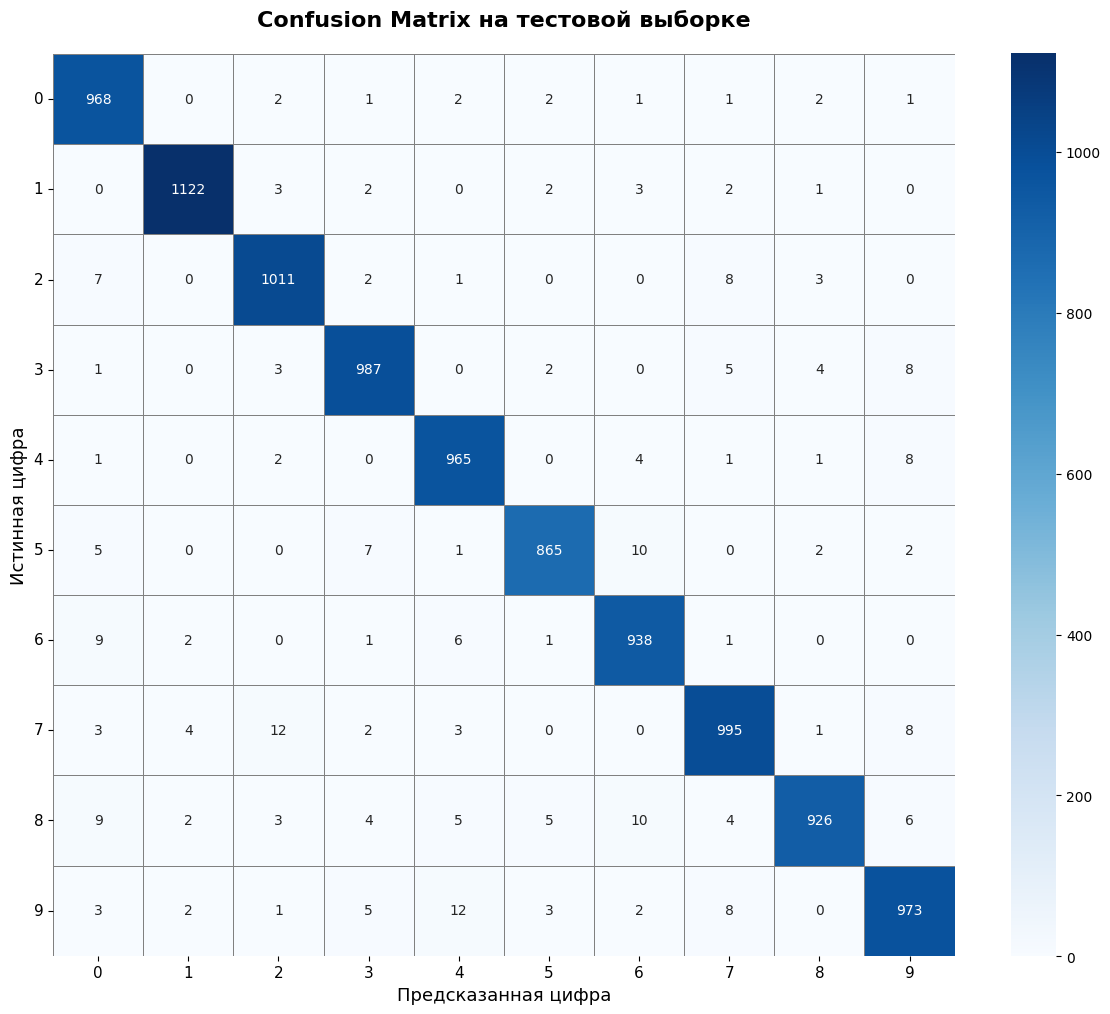


–ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ –æ—à–∏–±–∫–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
--------------------------------------------------
–¶–∏—Ñ—Ä–∞ 9 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 4: 12 —Ä–∞–∑ (1.2% –æ—Ç –≤—Å–µ—Ö 9)
–¶–∏—Ñ—Ä–∞ 7 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 2: 12 —Ä–∞–∑ (1.2% –æ—Ç –≤—Å–µ—Ö 7)
–¶–∏—Ñ—Ä–∞ 8 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 6: 10 —Ä–∞–∑ (1.0% –æ—Ç –≤—Å–µ—Ö 8)
–¶–∏—Ñ—Ä–∞ 5 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 6: 10 —Ä–∞–∑ (1.1% –æ—Ç –≤—Å–µ—Ö 5)
–¶–∏—Ñ—Ä–∞ 8 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 0: 9 —Ä–∞–∑ (0.9% –æ—Ç –≤—Å–µ—Ö 8)
–¶–∏—Ñ—Ä–∞ 6 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 0: 9 —Ä–∞–∑ (0.9% –æ—Ç –≤—Å–µ—Ö 6)
–¶–∏—Ñ—Ä–∞ 9 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 7: 8 —Ä–∞–∑ (0.8% –æ—Ç –≤—Å–µ—Ö 9)
–¶–∏—Ñ—Ä–∞ 7 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 9: 8 —Ä–∞–∑ (0.8% –æ—Ç –≤—Å–µ—Ö 7)
–¶–∏—Ñ—Ä–∞ 4 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 9: 8 —Ä–∞–∑ (0.8% –æ—Ç –≤—Å–µ—Ö 4)
–¶–∏—Ñ—Ä–∞ 3 –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ 9: 8 —Ä–∞–∑ (0.8% –æ—Ç –≤—Å–

In [10]:
# ============================================================
# –ë–õ–û–ö 9: CONFUSION MATRIX (–ú–ê–¢–†–ò–¶–ê –û–®–ò–ë–û–ö)
# ============================================================
# Confusion Matrix –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫–∏–µ —Ü–∏—Ñ—Ä—ã –º–æ–¥–µ–ª—å –ø—É—Ç–∞–µ—Ç –º–µ–∂–¥—É —Å–æ–±–æ–π
# –°—Ç—Ä–æ–∫–∏ - –∏—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏, —Å—Ç–æ–ª–±—Ü—ã - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–µ—Ç–∫–∏

print('\n' + '='*70)
print('–ü–û–°–¢–†–û–ï–ù–ò–ï CONFUSION MATRIX')
print('='*70)

# –í—ã—á–∏—Å–ª—è–µ–º confusion matrix
cm = confusion_matrix(test_labels, test_preds)

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º confusion matrix
plt.figure(figsize=(12, 10))

# –°–æ–∑–¥–∞–µ–º heatmap —Å –∞–Ω–Ω–æ—Ç–∞—Ü–∏—è–º–∏
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            square=True, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Ü–∏—Ñ—Ä–∞', fontsize=13)
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω–∞—è —Ü–∏—Ñ—Ä–∞', fontsize=13)
plt.xticks(np.arange(10) + 0.5, range(10), fontsize=11)
plt.yticks(np.arange(10) + 0.5, range(10), fontsize=11, rotation=0)

plt.tight_layout()
plt.show()

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ –æ—à–∏–±–∫–∏
print('\n–ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ –æ—à–∏–±–∫–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:')
print('-' * 50)

# –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ –æ—à–∏–±–æ–∫ (–∏—Å–∫–ª—é—á–∞—è –¥–∏–∞–≥–æ–Ω–∞–ª—å)
errors = []
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 0:
            errors.append((cm[i, j], i, j))

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –æ—à–∏–±–æ–∫
errors.sort(reverse=True)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø-10 –æ—à–∏–±–æ–∫
for count, true_label, pred_label in errors[:10]:
    percentage = 100 * count / np.sum(test_labels == true_label)
    print(f'–¶–∏—Ñ—Ä–∞ {true_label} –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–∞ –∫–∞–∫ {pred_label}: '
          f'{count} —Ä–∞–∑ ({percentage:.1f}% –æ—Ç –≤—Å–µ—Ö {true_label})')


–í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–Ø –û–®–ò–ë–û–ö –ú–û–î–ï–õ–ò

–ù–∞–π–¥–µ–Ω–æ 20 –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤


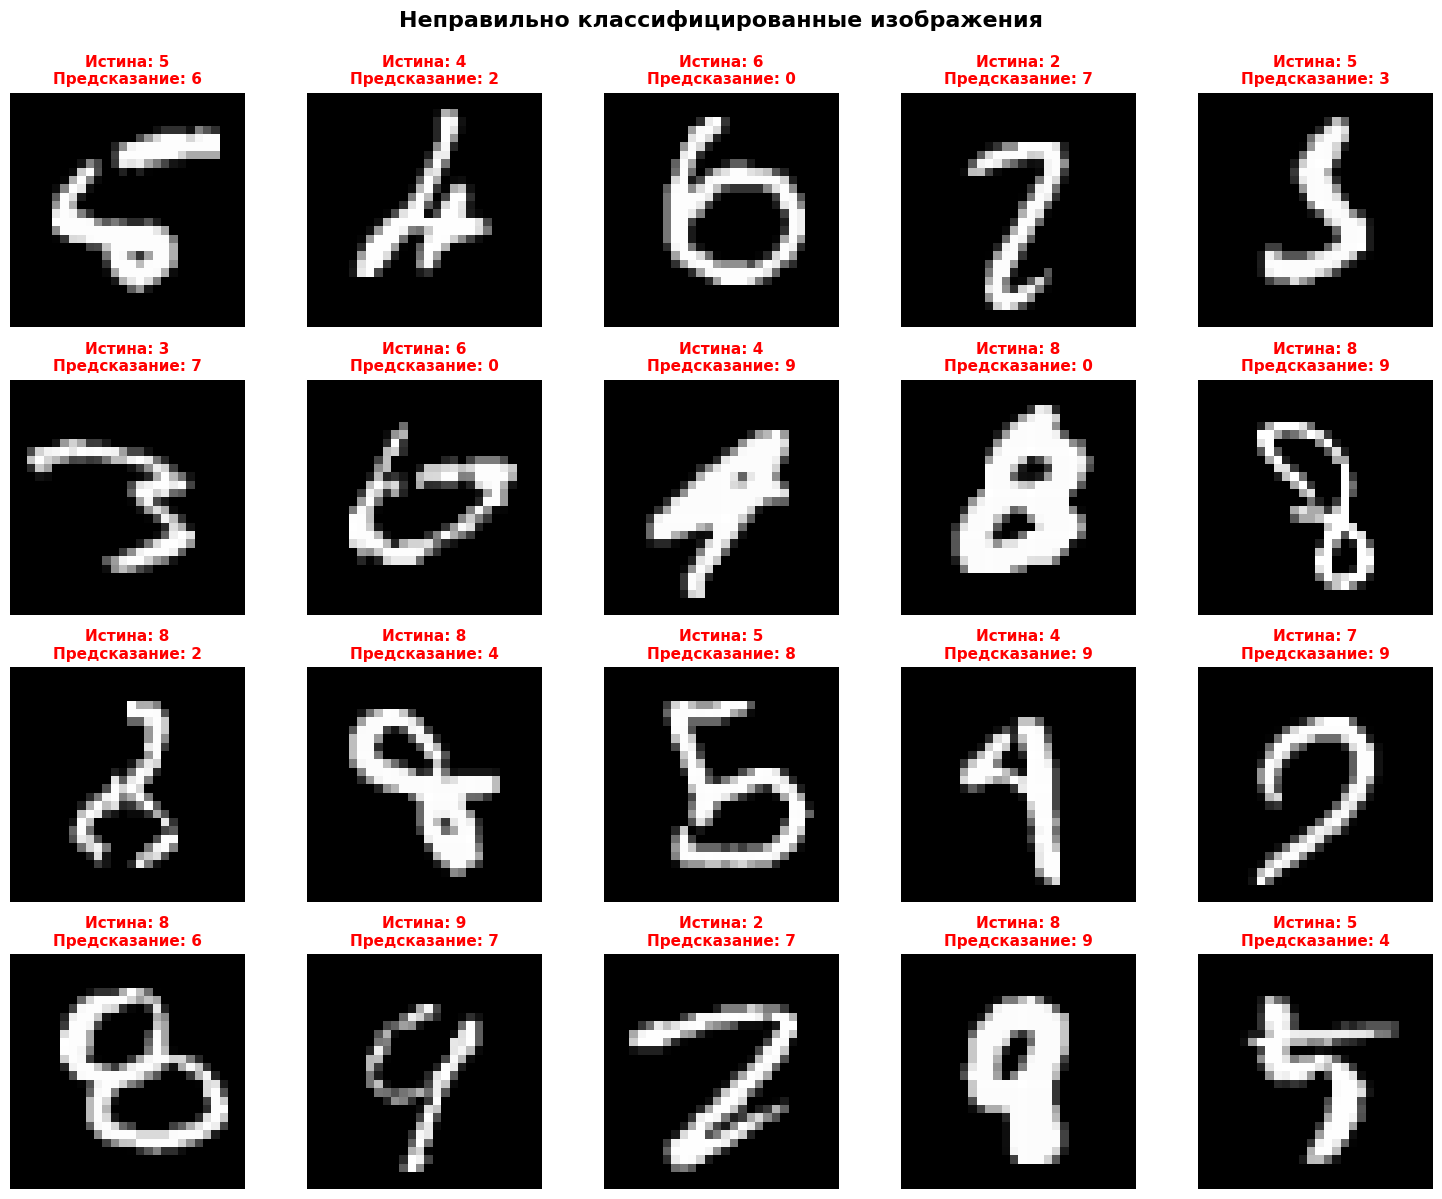


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –æ—à–∏–±–æ–∫ –≤ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö:
--------------------------------------------------
–ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ –ø–∞—Ä—ã (–∏—Å—Ç–∏–Ω–∞ -> –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ):
  6 -> 0: 2 —Ä–∞–∑
  2 -> 7: 2 —Ä–∞–∑
  4 -> 9: 2 —Ä–∞–∑
  8 -> 9: 2 —Ä–∞–∑
  5 -> 6: 1 —Ä–∞–∑


In [11]:
# ============================================================
# –ë–õ–û–ö 10: –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–Ø –ù–ï–ü–†–ê–í–ò–õ–¨–ù–û –ö–õ–ê–°–°–ò–§–ò–¶–ò–†–û–í–ê–ù–ù–´–• –ò–ó–û–ë–†–ê–ñ–ï–ù–ò–ô
# ============================================================
# –ó–¥–µ—Å—å –º—ã –Ω–∞–π–¥–µ–º –∏ –ø–æ–∫–∞–∂–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª—å –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª–∞ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ

print('\n' + '='*70)
print('–í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–Ø –û–®–ò–ë–û–ö –ú–û–î–ï–õ–ò')
print('='*70)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤
def get_misclassified_examples(model, dataloader, device, num_examples=20):
    """
    –ù–∞—Ö–æ–¥–∏—Ç –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - num_examples: —Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–º–µ—Ä–æ–≤ –Ω–∞–π—Ç–∏

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - misclassified_images: –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    - misclassified_true: –∏—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏
    - misclassified_pred: –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–µ—Ç–∫–∏
    """
    model.eval()

    misclassified_images = []
    misclassified_true = []
    misclassified_pred = []

    with torch.no_grad():
        for images, labels in dataloader:
            images_gpu = images.to(device)
            outputs = model(images_gpu)
            _, predicted = torch.max(outputs, 1)

            # –ù–∞—Ö–æ–¥–∏–º –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
            mask = predicted.cpu() != labels

            if mask.sum() > 0:
                wrong_images = images[mask]
                wrong_true = labels[mask]
                wrong_pred = predicted.cpu()[mask]

                misclassified_images.extend(wrong_images)
                misclassified_true.extend(wrong_true.numpy())
                misclassified_pred.extend(wrong_pred.numpy())

                # –ï—Å–ª–∏ —Å–æ–±—Ä–∞–ª–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–∏–º–µ—Ä–æ–≤, –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º—Å—è
                if len(misclassified_images) >= num_examples:
                    break

    return (misclassified_images[:num_examples],
            misclassified_true[:num_examples],
            misclassified_pred[:num_examples])

# –ü–æ–ª—É—á–∞–µ–º 20 –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤
mis_images, mis_true, mis_pred = get_misclassified_examples(model, test_loader, device, num_examples=20)

print(f'\n–ù–∞–π–¥–µ–Ω–æ {len(mis_images)} –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤')

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('–ù–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è',
             fontsize=16, fontweight='bold', y=0.995)

for idx, ax in enumerate(axes.flat):
    if idx < len(mis_images):
        # –ü–æ–ª—É—á–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        img = mis_images[idx].squeeze().numpy()

        # –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        ax.imshow(img, cmap='gray')

        # –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å—å —Å –∏—Å—Ç–∏–Ω–Ω–æ–π –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π –º–µ—Ç–∫–æ–π
        true_label = mis_true[idx]
        pred_label = mis_pred[idx]

        ax.set_title(f'–ò—Å—Ç–∏–Ω–∞: {true_label}\n–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: {pred_label}',
                    fontsize=11, color='red', fontweight='bold')
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –æ—à–∏–±–∫–∞–º
print('\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –æ—à–∏–±–æ–∫ –≤ –Ω–∞–π–¥–µ–Ω–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö:')
print('-' * 50)
error_pairs = {}
for true, pred in zip(mis_true, mis_pred):
    pair = (true, pred)
    error_pairs[pair] = error_pairs.get(pair, 0) + 1

print('–ù–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ –ø–∞—Ä—ã (–∏—Å—Ç–∏–Ω–∞ -> –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ):')
sorted_errors = sorted(error_pairs.items(), key=lambda x: x[1], reverse=True)
for (true, pred), count in sorted_errors[:5]:
    print(f'  {true} -> {pred}: {count} —Ä–∞–∑')


–ü–†–û–í–ï–†–ö–ê –ú–û–î–ï–õ–ò –ù–ê –°–õ–£–ß–ê–ô–ù–´–• –ü–†–ò–ú–ï–†–ê–•


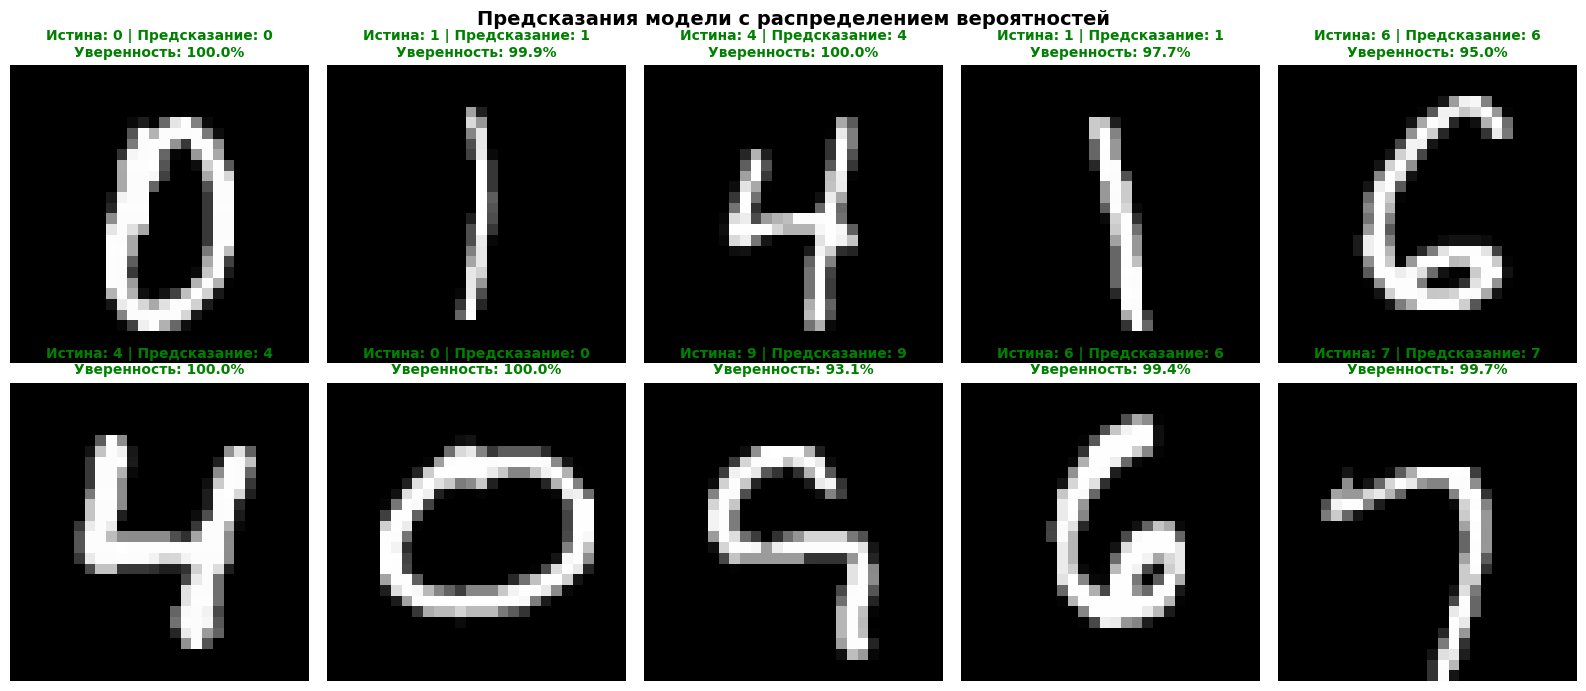


–î–µ—Ç–∞–ª—å–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞:
--------------------------------------------------
–ò—Å—Ç–∏–Ω–Ω–∞—è –º–µ—Ç–∫–∞: 0

–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞:
  –¶–∏—Ñ—Ä–∞ 0: 100.00% ‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
  –¶–∏—Ñ—Ä–∞ 1:  0.00% 
  –¶–∏—Ñ—Ä–∞ 2:  0.00% 
  –¶–∏—Ñ—Ä–∞ 3:  0.00% 
  –¶–∏—Ñ—Ä–∞ 4:  0.00% 
  –¶–∏—Ñ—Ä–∞ 5:  0.00% 
  –¶–∏—Ñ—Ä–∞ 6:  0.00% 
  –¶–∏—Ñ—Ä–∞ 7:  0.00% 
  –¶–∏—Ñ—Ä–∞ 8:  0.00% 
  –¶–∏—Ñ—Ä–∞ 9:  0.00% 


In [13]:
# ============================================================
# –ë–õ–û–ö 11: –î–û–ü–û–õ–ù–ò–¢–ï–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ò –ü–†–û–í–ï–†–ö–ê –ù–ê –°–õ–£–ß–ê–ô–ù–´–• –ü–†–ò–ú–ï–†–ê–•
# ============================================================

print('\n' + '='*70)
print('–ü–†–û–í–ï–†–ö–ê –ú–û–î–ï–õ–ò –ù–ê –°–õ–£–ß–ê–ô–ù–´–• –ü–†–ò–ú–ï–†–ê–•')
print('='*70)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏
def visualize_predictions_with_probabilities(model, dataloader, device, num_samples=10):
    """
    –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
    """
    model.eval()

    # –ü–æ–ª—É—á–∞–µ–º –æ–¥–∏–Ω –±–∞—Ç—á
    images, labels = next(iter(dataloader))

    # –í—ã–±–∏—Ä–∞–µ–º —Å–ª—É—á–∞–π–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã
    indices = np.random.choice(len(images), num_samples, replace=False)

    fig, axes = plt.subplots(2, 5, figsize=(16, 7))
    fig.suptitle('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–∏ —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π',
                 fontsize=14, fontweight='bold')

    with torch.no_grad():
        images_gpu = images.to(device)
        outputs = model(images_gpu)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        _, predictions = torch.max(outputs, 1)

    for idx, ax in enumerate(axes.flat):
        img_idx = indices[idx]

        # –ò–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        img = images[img_idx].squeeze().numpy()
        true_label = labels[img_idx].item()
        pred_label = predictions[img_idx].cpu().item()
        probs = probabilities[img_idx].cpu().numpy()

        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ü–≤–µ—Ç —Ä–∞–º–∫–∏ (–∑–µ–ª–µ–Ω—ã–π - –ø—Ä–∞–≤–∏–ª—å–Ω–æ, –∫—Ä–∞—Å–Ω—ã–π - –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ)
        color = 'green' if true_label == pred_label else 'red'

        # –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
        ax.imshow(img, cmap='gray')
        ax.set_title(f'–ò—Å—Ç–∏–Ω–∞: {true_label} | –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ: {pred_label}\n'
                    f'–£–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å: {probs[pred_label]*100:.1f}%',
                    fontsize=10, color=color, fontweight='bold')
        ax.axis('off')

        # –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–º–∫—É
        for spine in ax.spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(3)
            spine.set_visible(True)

    plt.tight_layout()
    plt.show()

    # –í—ã–≤–æ–¥–∏–º –¥–µ—Ç–∞–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞
    print('\n–î–µ—Ç–∞–ª—å–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –¥–ª—è –ø–µ—Ä–≤–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞:')
    print('-' * 50)
    img_idx = indices[0]
    probs = probabilities[img_idx].cpu().numpy()
    true_label = labels[img_idx].item()

    print(f'–ò—Å—Ç–∏–Ω–Ω–∞—è –º–µ—Ç–∫–∞: {true_label}')
    print('\n–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞:')
    for digit in range(10):
        bar = '‚ñà' * int(probs[digit] * 50)
        print(f'  –¶–∏—Ñ—Ä–∞ {digit}: {probs[digit]*100:5.2f}% {bar}')

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
visualize_predictions_with_probabilities(model, test_loader, device, num_samples=10)

In [14]:
# ============================================================
# –ë–õ–û–ö 12: –ò–¢–û–ì–û–í–ê–Ø –ò–ù–§–û–†–ú–ê–¶–ò–Ø –ò –°–û–•–†–ê–ù–ï–ù–ò–ï
# ============================================================

print('\n' + '='*70)
print('–ò–¢–û–ì–û–í–ê–Ø –ò–ù–§–û–†–ú–ê–¶–ò–Ø –û –ú–û–î–ï–õ–ò')
print('='*70)

# –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –º–æ–¥–µ–ª–∏
print('\n1. –ê–†–•–ò–¢–ï–ö–¢–£–†–ê –ú–û–î–ï–õ–ò:')
print('-' * 70)
print(model)

print(f'\n2. –ü–ê–†–ê–ú–ï–¢–†–´ –ú–û–î–ï–õ–ò:')
print('-' * 70)
print(f'   –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: {total_params:,}')
print(f'   –†–∞–∑–º–µ—Ä –º–æ–¥–µ–ª–∏ –≤ –ø–∞–º—è—Ç–∏: ~{total_params * 4 / (1024**2):.2f} MB (float32)')

print(f'\n3. –ù–ê–°–¢–†–û–ô–ö–ò –û–ë–£–ß–ï–ù–ò–Ø:')
print('-' * 70)
print(f'   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö: {num_epochs}')
print(f'   Batch size: {batch_size}')
print(f'   Learning rate: {1e-3}')
print(f'   –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä: Adam')
print(f'   –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å: CrossEntropyLoss')

print(f'\n4. –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ù–ê –î–ê–¢–ê–°–ï–¢–ê–•:')
print('-' * 70)
print(f'   Train Accuracy: {train_accuracies[-1]:.2f}%')
print(f'   Validation Accuracy: {val_accuracies[-1]:.2f}%')
print(f'   Test Accuracy: {test_accuracy:.2f}%')

print(f'\n5. –†–ê–ó–ú–ï–†–´ –î–ê–¢–ê–°–ï–¢–û–í:')
print('-' * 70)
print(f'   Train: {len(train_dataset)} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π')
print(f'   Validation: {len(val_dataset)} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π')
print(f'   Test: {len(test_dataset)} –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π')

print(f'\n6. –§–ê–ô–õ–´ –ú–û–î–ï–õ–ò:')
print('-' * 70)
print(f'   ‚úì –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤: best_model.pth')

# –°–æ–∑–¥–∞–µ–º –∏—Ç–æ–≥–æ–≤—ã–π –æ—Ç—á–µ—Ç –≤ –≤–∏–¥–µ —Å–ª–æ–≤–∞—Ä—è
final_report = {
    'model_architecture': 'MLP (784 -> 256 -> 128 -> 10)',
    'total_parameters': total_params,
    'num_epochs': num_epochs,
    'batch_size': batch_size,
    'learning_rate': 1e-3,
    'optimizer': 'Adam',
    'train_accuracy': train_accuracies[-1],
    'val_accuracy': val_accuracies[-1],
    'test_accuracy': test_accuracy,
    'best_epoch': checkpoint['epoch'] + 1,
    'best_val_accuracy': checkpoint['val_accuracy']
}

print('\n' + '='*70)
print('–†–ê–ë–û–¢–ê –ó–ê–í–ï–†–®–ï–ù–ê –£–°–ü–ï–®–ù–û! ‚úì')
print('='*70)

print('\nüìä –ò–¢–û–ì–û–í–´–ô –û–¢–ß–ï–¢:')
print(f"""
‚ïî‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïó
‚ïë                    –†–ï–ó–£–õ–¨–¢–ê–¢–´ –û–ë–£–ß–ï–ù–ò–Ø                        ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë  –ê—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞: {final_report['model_architecture']:<45} ‚ïë
‚ïë  –ü–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: {final_report['total_parameters']:>46,} ‚ïë
‚ïë  –≠–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è: {final_report['num_epochs']:>44} ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë  Train Accuracy: {final_report['train_accuracy']:>42.2f}% ‚ïë
‚ïë  Validation Accuracy: {final_report['val_accuracy']:>37.2f}% ‚ïë
‚ïë  Test Accuracy: {final_report['test_accuracy']:>43.2f}% ‚ïë
‚ï†‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï£
‚ïë  –õ—É—á—à–∞—è —ç–ø–æ—Ö–∞: {final_report['best_epoch']:>45} ‚ïë
‚ïë  –õ—É—á—à–∞—è Val Accuracy: {final_report['best_val_accuracy']:>37.2f}% ‚ïë
‚ïö‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïù
""")

print('\nüí° –°–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏:')
print('   1. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –∏–∑–º–µ–Ω–∏—Ç—å –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É (–±–æ–ª—å—à–µ —Å–ª–æ–µ–≤, –±–æ–ª—å—à–µ –Ω–µ–π—Ä–æ–Ω–æ–≤)')
print('   2. –ü–æ—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ —Å dropout –∏ batch normalization')
print('   3. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –¥—Ä—É–≥–∏–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã (SGD, RMSprop)')
print('   4. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ data augmentation –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤')
print('   5. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Å–≤–µ—Ä—Ç–æ—á–Ω—É—é —Å–µ—Ç—å (CNN) –¥–ª—è –µ—â–µ –ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤')

print('\n' + '='*70)


–ò–¢–û–ì–û–í–ê–Ø –ò–ù–§–û–†–ú–ê–¶–ò–Ø –û –ú–û–î–ï–õ–ò

1. –ê–†–•–ò–¢–ï–ö–¢–£–†–ê –ú–û–î–ï–õ–ò:
----------------------------------------------------------------------
MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

2. –ü–ê–†–ê–ú–ï–¢–†–´ –ú–û–î–ï–õ–ò:
----------------------------------------------------------------------
   –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: 235,146
   –†–∞–∑–º–µ—Ä –º–æ–¥–µ–ª–∏ –≤ –ø–∞–º—è—Ç–∏: ~0.90 MB (float32)

3. –ù–ê–°–¢–†–û–ô–ö–ò –û–ë–£–ß–ï–ù–ò–Ø:
----------------------------------------------------------------------
   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö: 10
   Batch size: 128
   Learning rate: 0.001
   –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä: Adam
   –§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å: CrossEntropyLoss

4. –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ù–ê –î–ê–¢–ê–°–ï–¢–ê–•:
--------------------